**Group members:** Tim Bakkenes, Agnes Magnusson, Elvira Moberg

# Task 1: A classification example: fetal heart condition diagnosis
 This is a classification task based on a dataset of fetal heart diagnosis. The task is to predict a diagnosis type using different classifier models.

## Step 1: Reading the data
The first part of task one is to read the data from the file and split it into a train set and a test set.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# First the csv file is read using pandas
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns, these are the colums we want.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']

# dropna() gets rid of all missing values.
data = data[selected_cols].dropna()

# The dataset is then shuffled so the order of the data does not matter.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Next step is to separate the X and the Y for this dataset.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# The data is partitioned into a traing and test set.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [2]:
# Used to look at first few rows
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


## Step 2: Training the baseline classifier

### Dummy Classifier

The DummyClassifier below is very simple. It works by simply returning the most common label in the training set. The purpose of having a dummy classifier is to use it as a baseline to compare the other models we want to use to make predictions for example.

In this assignment, we are asked to use cross-validation to get an idea of how well our models perform. We must also find a way to aggregate these scores so that you get a single score that can then be used to compare different classifiers. Two ways of doing this are shown below, using the mean and using the median.

In [3]:
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier(strategy='most_frequent')
cvr = cross_val_score(clf, Xtrain, Ytrain)

# Calculate median
median = np.median(cvr)
print(f"Median: {median}")

# Calculate average
mean = np.mean(cvr)
print(f"Mean: {mean}")

Median: 0.7794117647058824
Mean: 0.7805882352941176


## Step 3: Trying out some different classifiers
For this part of task 1 we tried out a few different classifiers and tried tuning the hyperparameters to improve the performance.

In [4]:
# Tree-based classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Linear classifiers
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Neural network classifier
from sklearn.neural_network import MLPClassifier

Below are all of the models tried in one cell. The random state variable was set to 42 and makes it so every run is reproducible. The hyperparameters that was experimented with were the number of estimators in the ensemble of trees like random forest and the gradient boosting classifier and the regulariation for the linear perceptron and logistic regression.

In [5]:
clf_decision_tree = DecisionTreeClassifier(random_state=42)
cvr_decision_tree = cross_val_score(clf_decision_tree, Xtrain, Ytrain)
print(f"Decision tree median accuracy: {np.median(cvr_decision_tree)}")

clf_random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
cvr_random_forest = cross_val_score(clf_random_forest, Xtrain, Ytrain)
print(f"Random Forest median accuracy: {np.median(cvr_random_forest)}")

clf_gradient_boost = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=3)
cvr_gradient_boost = cross_val_score(clf_gradient_boost, Xtrain, Ytrain)
print(f"Gradient Boosting median accuracy: {np.median(cvr_gradient_boost)}")

clf_perceptron = Perceptron(random_state=42, penalty='l2', alpha=0.00001)
cvr_perceptron = cross_val_score(clf_perceptron, Xtrain, Ytrain)
print(f"Perceptron median accuracy: {np.median(cvr_perceptron)}")

clf_logistic = LogisticRegression(random_state=42, penalty="l2", max_iter=10000)
cvr_logistic = cross_val_score(clf_logistic, Xtrain, Ytrain)
print(f"Logistic Regression median accuracy: {np.median(cvr_logistic)}")

clf_linear_svc = LinearSVC(random_state=42)
cvr_linear_svc = cross_val_score(clf_linear_svc, Xtrain, Ytrain)
print(f"LinearSVC median accuracy: {np.median(cvr_linear_svc)}")

clf_mlp = MLPClassifier(random_state=42)
cvr_mlp = cross_val_score(clf_mlp, Xtrain, Ytrain)
print(f"MLP Classifier meadian accuracy: {np.median(cvr_mlp)}")

Decision tree median accuracy: 0.9117647058823529
Random Forest median accuracy: 0.9352941176470588
Gradient Boosting median accuracy: 0.9441176470588235
Perceptron median accuracy: 0.8323529411764706


/Users/elviramoberg/IdeaProjects/ML assignment 1/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elviramoberg/IdeaProjects/ML assignment 1/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Logistic Regression median accuracy: 0.8941176470588236
LinearSVC median accuracy: 0.8941176470588236
MLP Classifier meadian accuracy: 0.9


## Step 4. Final evaluation
It can be seen in the output from the previous cell that the gradient boosting algorithm seems to have the best median performance. It was therefore the model that was trained on the whole training set and then evaluated on the test set.

#### Gradient Boosting Algorithms

In short, gradient bossting algorithms are ensembles, normally of decision trees. By combining multiple decision trees the idea is that it will create a more powerful predictive model.

Boosting is a technique where every new model will try and correct the errors of the previous model. So first one model will try and predict some target variable, then the error or residuals which is the difference between the predictions and the actual values is calculated. The next tree will then be trained on these residuals or errors and try to fix the first models errors. And these predictions are then combined together to make a final prediction.

In [6]:
from sklearn.metrics import accuracy_score

# Fit the gradient boosting algorithm to the training data and test the model on the test set
clf_gradient_boost.fit(Xtrain, Ytrain)
Yguess = clf_gradient_boost.predict(Xtest)
print(accuracy_score(Yguess, Ytest))

0.9295774647887324


# Task 2: Decision trees for classification

In this task code is downloaded for a decision tree classifier and the hyperparamter max_depth is tuned to get the best cross-validation performance. Then the model is evaluated on the test set using the chosen max_depth.

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

### The Decision Tree class and subclasses

In [8]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
        
    def to_str(self, indent, lines, names):
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        lines.append(' '*indent + val_str)

class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        
    def to_str(self, indent, lines, names):
        pad = ' '*indent
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lines.append(pad + f'{fname} <= {self.threshold:.3g}?')
        lines.append(pad + '  True =>')
        self.low_subtree.to_str(indent+4, lines, names)
        lines.append(pad + '  False =>')
        self.high_subtree.to_str(indent+4, lines, names)


from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        
        _, best_feature, best_threshold = \
            max(self.best_split(X, Y, feature) 
                for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = \
            self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    def __str__(self):
        lines = []
        self.root.to_str(0, lines, self.names)
        return '\n'.join(lines)
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass
        

### Some Functions from the assignment used

In [9]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

### Decision Tree Classifier

In [10]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

### Reading the data and preprocessing in the same way as task 1

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# First the csv file is read using pandas
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns, these are the colums we want.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']

# dropna() gets rid of all missing values.
data = data[selected_cols].dropna()

# The dataset is then shuffled so the order of the data does not matter.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Next step is to separate the X and the Y for this dataset.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# The data is partitioned into a traing and test set.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

### Testing the cross-validation performance for different max_depth

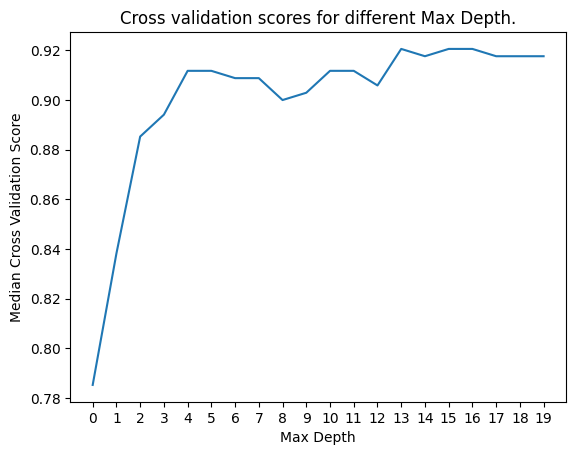

In [12]:
cvscores = []
for depth in range(20):
    cls = TreeClassifier(max_depth=depth)
    cvscores.append(np.median(cross_val_score(cls, Xtrain, Ytrain)))

plt.title("Cross validation scores for different Max Depth.")
plt.xlabel("Max Depth")
plt.ylabel("Median Cross Validation Score")
plt.xticks(ticks=[x for x in range(20)])
plt.plot(cvscores)


The different cross-validation scores are shown above. In order to find the best one programmatically, the code below was run. At first it was implemented by finding the max of all the median cross-validation scores and then finding the index of that value to get the max depth. Since the score at index i is the score when the max weight was i this approach works to get the best score but not to get the best max_depth since multiple max_depth values could give the same score.

That approach was used at first but the score is the same for 13 and 16 so therefore the np library argsort was used to get all the indices of the top n biggest values.

In [13]:
cvscores_nparr = np.array(cvscores)
indices = np.argsort(cvscores_nparr)

# Reversing to get max_depth with higest score first.
reversed_indices = indices[::-1]

top_3_indices = reversed_indices[:3]
top_3_scores = cvscores_nparr[top_3_indices]

max1_accuracy = top_3_scores[0]
depth_1 = top_3_indices[0]

max2_accuracy = top_3_scores[1]
depth_2 = top_3_indices[1]

max3_accuracy = top_3_scores[2]
depth_3 = top_3_indices[2]


print(f"Best accuracy of: {max1_accuracy} achieved with max_depth set to {depth_1}")
print(f"Second best accuracy of: {max2_accuracy} achieved with max_depth set to {depth_2}")
print(f"Third best accuracy of: {max3_accuracy} achieved with max_depth set to {depth_3}")

Best accuracy of: 0.9205882352941176 achieved with max_depth set to 16
Second best accuracy of: 0.9205882352941176 achieved with max_depth set to 15
Third best accuracy of: 0.9205882352941176 achieved with max_depth set to 13


### Evaluation of the decision tree with chosen max depth

The accuracy score was evaluated using the top three cross-validation scores. It can be seen that the best accuracy was achived with the third best cross-validation score depth. It could be that the model starts to overfit ever so slightly which means the max_depth of 4 can still be better despite being less complex.

In [14]:
from sklearn.metrics import accuracy_score

cls_16 = TreeClassifier(max_depth=16)
cls_16.fit(Xtrain, Ytrain)
Yguess = cls_16.predict(Xtest)
print(f" Accuracy score with max depth set to {depth_1}: {accuracy_score(Ytest, Yguess)}")

cls_13 = TreeClassifier(max_depth=13)
cls_13.fit(Xtrain, Ytrain)
Yguess = cls_13.predict(Xtest)
print(f" Accuracy score with max depth set to {depth_2}: {accuracy_score(Ytest, Yguess)}")

cls_4 = TreeClassifier(max_depth=4)
cls_4.fit(Xtrain, Ytrain)
Yguess = cls_4.predict(Xtest)
print(f" Accuracy score with max depth set to {depth_3}: {accuracy_score(Ytest, Yguess)}")

 Accuracy score with max depth set to 16: 0.8826291079812206
 Accuracy score with max depth set to 15: 0.8732394366197183
 Accuracy score with max depth set to 13: 0.8896713615023474


### Chosen depth: 4, Accuracy Score: 0.8896713615023474


### Drawing the tree

Drawing the tree with max_depth 4 below.

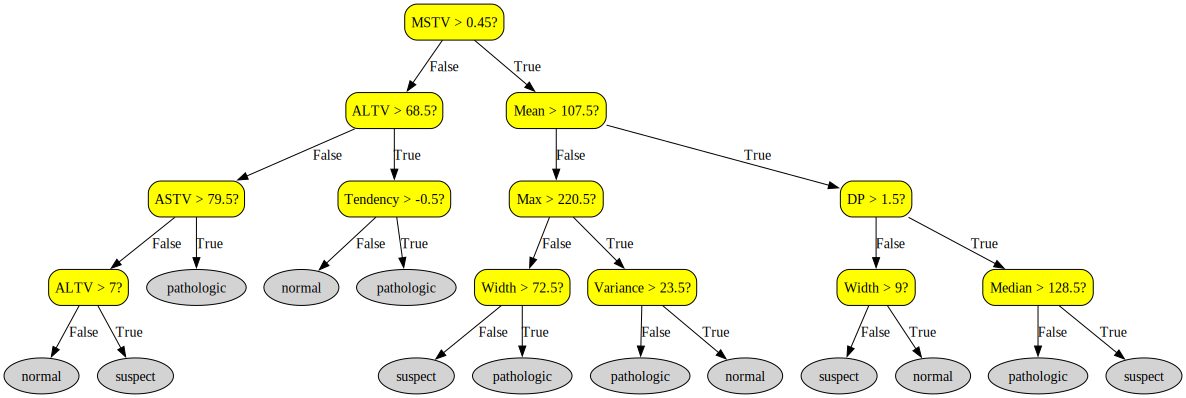

In [15]:
cls = TreeClassifier(max_depth=4)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

# Task 3: A regression example: predicting apartment prices

In this task, different regression models are experimented with on a dataset with information about the russian real estate market. The goal is to predict the price of an apartment, given numerical information about the number of rooms, the size of the apartment and more.

The workflow looks similar to what it did for task 1 where a suitable model was found using cross-validation over the training set and then the chosen model was evaluated on the test data.

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

The following code is given to transfor the data into the right format for regression and selects which columns should be used.

In [17]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 7 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

A dummy classifier that always predicts the same value is used as a basline to compare the other models.

The code in this task looks quite similar to the code in task 1. The main difference is that we are looking at numerical predictions rather than labels(classes) and that the evaluation is done using a different metric, in this case mean squared error.

In [18]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
score = cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

0.3905715631956676


#### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

m5 = LinearRegression()
score = cross_validate(m5, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

0.29377903315023374


#### Ridge

In [20]:
from sklearn.linear_model import Ridge

m_ridge = Ridge(random_state=42)
score = cross_validate(m_ridge, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

0.29377831441920216


#### Lasso

In [21]:
from sklearn.linear_model import Lasso

m_lasso = Lasso(random_state=42)
score = cross_validate(m_lasso, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

0.3006132501377651


#### Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

m_dtr = DecisionTreeRegressor(random_state=42, max_depth=6)
score = cross_validate(m_dtr, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

0.28017072517822894


#### Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

m3 = RandomForestRegressor(random_state=42)
score = cross_validate(m3, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

0.28406740746581044


#### Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

m2 = GradientBoostingRegressor(random_state=42)
score = cross_validate(m2, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

0.263311184683057


#### MLP Regressor

In [25]:
from sklearn.neural_network import MLPRegressor

m4 = MLPRegressor(hidden_layer_sizes=32, activation="relu", random_state=42)
score = cross_validate(m4, Xtrain, Ytrain, scoring='neg_mean_squared_error')
print(-np.median(score["test_score"]))

/Users/elviramoberg/IdeaProjects/ML assignment 1/ml-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/elviramoberg/IdeaProjects/ML assignment 1/ml-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


15.341752245864633


#### Evaluation of the most promising model.
Once again just like in task 1, the most promising model is a gradient boosting algorithm but in this case for regression instead of classification.

##### Description of the model
In short, gradient bossting algorithms are ensembles, normally of decision trees. By combining multiple decision trees the idea is that it will create a more powerful predictive model.

A gradient boosting regressor is similar to a classifier but it works by returning a numerical value instead of predicting a label based on some decision boundry. 

The following text was also used for task 1 but explains the main idea of gradient boosting algorithms. 

Boosting is a technique where every new model will try and correct the errors of the previous model. So first one model will try and predict some target variable, then the error or residuals which is the difference between the predictions and the actual values is calculated. The next tree will then be trained on these residuals or errors and try to fix the first models errors. And these predictions are then combined together to make a final prediction.

##### Final MSE: 0.2581934547511049
In order to get the results, the hyperparameters of the model had to be fine tuned. This was done using experimentation and tweaking the parameters to what seemed to be the optimal value. This included changing the number of trees used in the enseble, which correlates to the number of boosting stages to perform. It seemed like adding more trees did not make the model overfit much so it was set to 400. The max depth and learning rate and min_samples_leaf also had an effect on the result.

Final hyperparameters:
- n_estimators: 400
- min_samples_leaf: 4
- max_depth: 4
- learning_rate: 0.09


In [26]:
from sklearn.metrics import mean_squared_error

m2 = m2 = GradientBoostingRegressor(random_state=42, n_estimators=400, min_samples_leaf=4, max_depth=4, learning_rate=0.09)
m2.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, m2.predict(Xtest))

0.2581934547511049

# Task 4: Decision trees for regression
For Task 4, a TreeRegressor class is implemented to compute regression with decision trees. The model is then trained and evaluated on the apartment prices example used in Task 3. How underfitting and overfitting occurs when max tree depth changes is also shown.

### Some of the necessary Imports

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_squared_error
from graphviz import Digraph
from sklearn.base import BaseEstimator
from abc import ABC, abstractmethod

### DecisionTree classes reused from previous task

In [28]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
        
    def to_str(self, indent, lines, names):
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        lines.append(' '*indent + val_str)


class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        
    def to_str(self, indent, lines, names):
        pad = ' '*indent
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lines.append(pad + f'{fname} <= {self.threshold:.3g}?')
        lines.append(pad + '  True =>')
        self.low_subtree.to_str(indent+4, lines, names)
        lines.append(pad + '  False =>')
        self.high_subtree.to_str(indent+4, lines, names)


class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        
        _, best_feature, best_threshold = \
            max(self.best_split(X, Y, feature) 
                for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = \
            self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    def __str__(self):
        lines = []
        self.root.to_str(0, lines, self.names)
        return '\n'.join(lines)
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

## Step 1: Implementing the regression model

The TreeRegressor class has been implemented similarly to TreeClassifier, and much of the code could be reused since TreeRegressor also inherits from the abstract class DecisionTree. The functions *get_default_value*, *is_homogeneous*, and *best_split* have been implemented differently compared to TreeClassifier, and the function *fit* has been overridden to instead set the criterion function to *variance_scorer*.

The *get_default_value* function returns the mean of Y instead of the most common value, aligning with regression tasks. The is_homogeneous function still checks whether a set of output values is homogeneous. However, in the regression case, this condition is met when the variance is smaller than a certain threshold value that can be specified when creating an instance of the class.

The *best_split* function for TreeRegressor also differs from *best_split* for TreeClassifier. Instead of keeping track of the class labels for the upper and lower parts, it computes the sums of the upper and left parts of the split. It also calculates the variances of the resulting partitions and selects the split that minimizes the weighted average of these variances. This approach ensures the split improves the predictive accuracy for regression tasks. This homogeneity criterion is given in the assignment and is according to the instructions the most typically used in decision tree regression. It is called "variance reduction".

In [29]:

class TreeRegressor(DecisionTree, RegressorMixin):
    def __init__(self, max_depth=10, criterion='variance', homogeneity_threshold=1e-6):
        super().__init__(max_depth)
        self.criterion = criterion
        self.homogeneity_threshold = homogeneity_threshold
        
    def variance_scorer(self, size_upper, sum_upper, sq_sum_upper, size_lower, sum_lower, sq_sum_lower, total_variance, total_size):
        # Calculate variance for the upper and lower parts if they have elements
        # Set variance to 0 if there are no elements
        if size_upper > 0:
            left_variance = (sq_sum_upper / size_upper) - (sum_upper / size_upper) ** 2
        else: 
            left_variance = 0 
        
        if size_lower > 0:
            right_variance = (sq_sum_lower / size_lower) - (sum_lower / size_lower) ** 2 
        else: 
            right_variance = 0

        # Compute the weighted average of variances for both the upper and lower part
        weighted_variance = (size_upper / total_size) * left_variance + (size_lower / total_size) * right_variance

        # Calculate the variance reduction that was achieved by the split according to the formula given in the assignment and return it
        variance_reduction = total_variance - weighted_variance
        return variance_reduction
        
    def fit(self, X, Y):
        # For decision tree regressor, homogenity is normally measured with the criterion "variance reduction"
        if self.criterion == 'variance':
            self.criterion_function = self.variance_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

 
    def get_default_value(self, Y):
        """Returns the mean of the Y values."""
        return np.mean(Y)
    
    def is_homogeneous(self, Y):
        """Returns True if the variance is lower then the homogeneity threshold, otherwise returns False."""
        return (np.var(Y) < self.homogeneity_threshold)
        
    def best_split(self, X, Y, feature):
        """
        Generates the best split by maximizing the variance reduction of the split.

        Returns:
            max_var_reduction: the maximum variance reduction
            feature: the feature that was passed to this function
            split_point: the split point that generated the best split
        """
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = np.array(X[sorted_indices, feature])
        Y_sorted = np.array(Y[sorted_indices])

        n = len(Y)

        # Initialize sums and sizes for upper and lower parts of the split
        # This is done to avoid having to compute the variances from scratch at each possible threshold
        sum_upper = 0
        sq_sum_upper = 0
        size_upper = 0
        sum_lower = np.sum(Y_sorted)
        sq_sum_lower = np.sum(Y_sorted**2)
        size_lower = n
        total_variance = np.var(Y_sorted)

        # Keep track of the best result so far
        max_var_reduction = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position)
        for i in range(0, n-1):

            # Input and output at the current position
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update sums and sizes for the upper and lower part
            sum_upper += y_i
            size_upper += 1
            sq_sum_upper += y_i**2
            sum_lower -= y_i
            sq_sum_lower -= y_i**2
            size_lower -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position
            variance_reduction = self.criterion_function(size_upper, sum_upper, sq_sum_upper, size_lower, sum_lower, sq_sum_lower, total_variance, n)

            # If this is the best split, remember it.
            if variance_reduction > max_var_reduction:
                max_var_reduction = variance_reduction
                max_i = i
            
        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_var_reduction, feature, split_point


## Step 2: Sanity check

In [30]:
def make_some_data(n):
    """Generates some test data."""
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

The input feature X is a single continuous feature that was sampled uniformly between -5 and 5 and then reshaped into a 2D-matrix. 

The target variable Y is more interesting since it contains two parts, one part is n samples sampled from the normal distribution. The values are then scaled by 0.1 which will mean the values will be mostly close to 0 in relative terms. The second part is binary, either 0 or 1 depending on the value of x. When x > 1, 1 is added to the value at that index for Y. This means that all values for x > 1 will be distributed closely to the Y value 1 and when x <= 1 the same thing will happen but around 0 instead. The fact that we have two groups like this makes it more logical that this dataset would be used for a classification task.

A classification tree would probably be best for describing this data since there will be what we could call two groups that could be nicely separated by a decision boundrary from a Decision Tree. If we still want a Regressor from the Decision Tree like what has been implemented above the decision tree sould probably be a straight line at y = 0 from negative infinity until x = 1 and then it should be a straigt line at y = 1 until infinity after that. That would be the best way to describe the data with a Regressor Decision Tree.

Because of this it would make sense that the *max_depth* parameter should be set to 1 since there only has to be a single decision node. What it would look like will be shown below. The model could fit the training data better with a higher depth, but this would cause the model to overfit.

In [31]:
X, Y = make_some_data(20)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

Testing the model with max_depth = 1 and printing the MSE and showing the tree. The tree does not look exacly like the description in the text above. However, this could be because there are no values at exactly or very close to 1 which cause it to deviate from those values. Furthermore, the number of data points was very small, only 20 which makes the predictions deviate from what would be optimal if the number of data points was very large.

0.00412372748465772


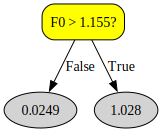

In [32]:
model = TreeRegressor(max_depth=1)
model.fit(Xtrain, Ytrain)
Yguess = model.predict(Xtest)
print(mean_squared_error(Ytest, Yguess))
model.draw_tree()

In order to better show the predictions, the predictions were plotted along side the actual values to show how the model makes its predictions below.

MSE: 0.00412372748465772


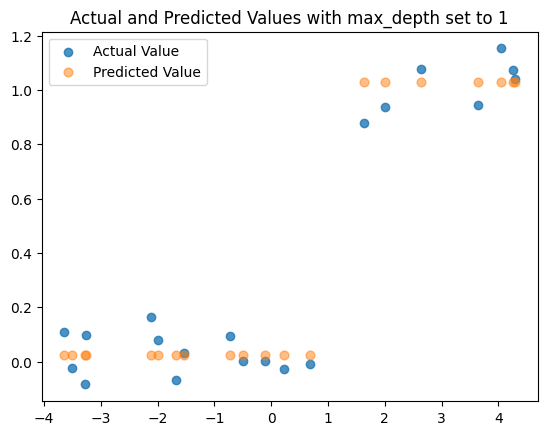

In [33]:
model = TreeRegressor(max_depth=1)
model.fit(Xtrain, Ytrain)
Yguess = model.predict(Xtest)
print(f"MSE: {mean_squared_error(Ytest, Yguess)}")
model.draw_tree()

Y_predictions = model.predict(X)

plt.title("Actual and Predicted Values with max_depth set to 1")
plt.scatter(X, Y, label="Actual Value", alpha=0.8)
plt.scatter(X, Y_predictions, label="Predicted Value", alpha=0.5, s=40)
plt.legend()
plt.show()

**Does the result make sense?**

Yes, the result makes sense. The predictions closely follow two lines that was described above and is what is expected. It can also be seen that the MSE is very low, which also makes sense since the scaling factor was applied that ensures the dots are close to either 0 or 1. It is important to keep in mind here that the MSE does not represent the generalizability of the model, it is simply a metric on how well the model can be fit to the training data, so the training loss.

**What happens if we allow the tree depth to be a large number?**

In order to get the answer to this, some experimentation is carried out below.

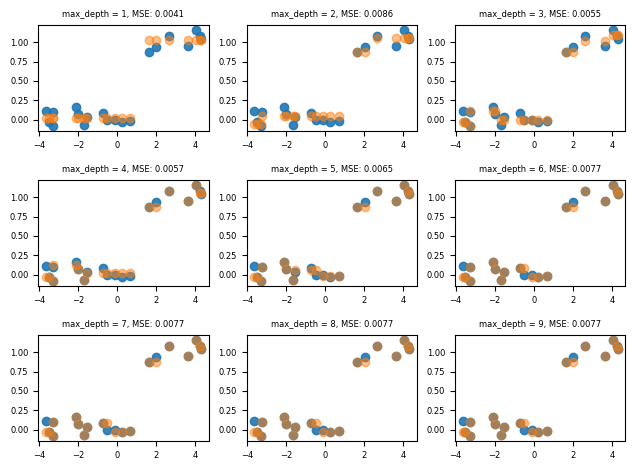

In [34]:
fig, ax = plt.subplots(3, 3)
for i in range(9):

    model = TreeRegressor(max_depth=i + 1)
    model.fit(Xtrain, Ytrain)
    Yguess = model.predict(Xtest)
    Y_predictions = model.predict(X)

    # To find the right subplot
    row = i // 3
    col = i % 3
    ax[row][col].title.set_text(f"max_depth = {i + 1}, MSE: {round(mean_squared_error(Ytest, Yguess), 4)}")
    ax[row][col].title.set_size(6)
    ax[row][col].scatter(X, Y, label="Actual Value", alpha=0.9)
    ax[row][col].scatter(X, Y_predictions, label="Predicted Value", alpha=0.5)
    ax[row][col].xaxis.set_tick_params(labelsize=6)
    ax[row][col].yaxis.set_tick_params(labelsize=6)

plt.subplots_adjust(left=None, bottom=None, right=None, top=20, wspace=None, hspace=None)
plt.tight_layout()
plt.show()

What can be seen is that the model start to perfectly follow the dots in some cases when the *max_depth* is increased to 10. With more splits the model becomes more complex but with this amount of data it is able to perfetly cover the data points. In doing so, it is also interesting to see that the MSE actually increases in some cases (it depends on the run since the data is generated randomly). In the plot above where all values of *max_depth* from 1 to 9 was tested, the lowest MSE was achieved when *max_depth* was set to 1. Another interesting thing is that as *max_depth* increases above 5, there is no longer any change to the predicted values, **the values in orange**, no longer during most runs, the model is unable to fit better to the data. One interesting experiment was increasing the number of data points from 20 to 200, then there was a change even after *max_depth* went beyond 6 and the MSE became worse the more complex we made the model. It could also be seen that the predictions come much closer to 0:s and 1:s and that the split is much closer to 1 on the x-axis.

## Step 3: Predicting apartment prices using decision tree regression

This part of the assignment asks the students to make some predictions on apartment prices using the Decision Tree model. The next cell will read the data from the file.

In [35]:
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 7 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

The next step was to train and evaluate the model and then report what tree depth was used and what score was achieved. In order to do that, we tried training the model for different values of *max_depth* and then chose the best one.

0.28624256155337435


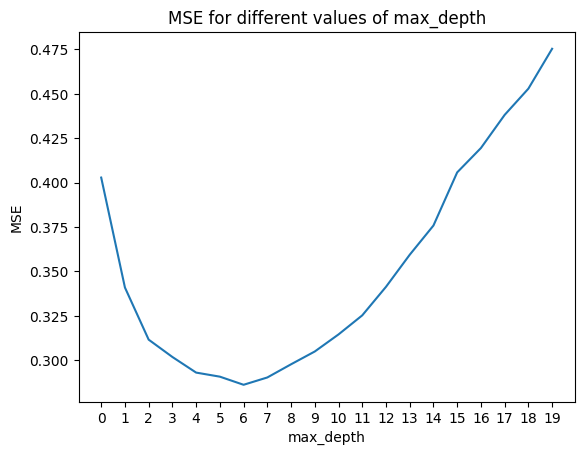

In [36]:
model = TreeRegressor(max_depth=6)
model.fit(Xtrain, Ytrain)
Yguess = model.predict(Xtest)
print(mean_squared_error(Ytest, Yguess))

mse_values = []
for i in range(20):
    model = TreeRegressor(max_depth=i)
    model.fit(Xtrain, Ytrain)
    Yguess = model.predict(Xtest)
    mse_values.append(mean_squared_error(Ytest, Yguess))

plt.title("MSE for different values of max_depth")
plt.plot(mse_values)
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.xticks([i for i in range(20)])
plt.show()

It could be seen that the best MSE value was achieved when the max_depth was set to 6. So that is the final value that was chosen.

#### Final Run of step 3 with max_depth = 6 and MSE = 0.28624256155337435

In [37]:
model = TreeRegressor(max_depth=6)
model.fit(Xtrain, Ytrain)
Yguess = model.predict(Xtest)
print(mean_squared_error(Ytest, Yguess))

0.28624256155337435


## Step 4: Underfitting and overfitting

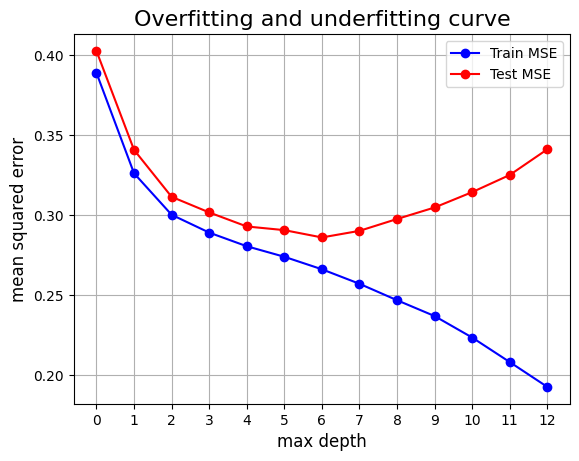

In [38]:
def evaluation_score_plot(Xtrain, Ytrain, Xtest, Ytest):
    max_depth_range = range(0, 13)
    train_scores = []
    test_scores = []

    for max_depth in max_depth_range:
        model = TreeRegressor(max_depth=max_depth)
        model.fit(Xtrain, Ytrain)
        Yguess_train = model.predict(Xtrain)
        Yguess_test = model.predict(Xtest)
        train_scores.append(mean_squared_error(Ytrain, Yguess_train))
        test_scores.append(mean_squared_error(Ytest, Yguess_test))

    plt.plot(max_depth_range, train_scores, label='Train MSE', color='blue', marker='o')
    plt.plot(max_depth_range, test_scores, label='Test MSE', color='red', marker='o')

    plt.title('Overfitting and underfitting curve', fontsize=16)
    plt.xlabel('max depth', fontsize=12)
    plt.xticks([i for i in range(13)])
    plt.ylabel('mean squared error', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()


evaluation_score_plot(Xtrain, Ytrain, Xtest, Ytest)

**Comment on the differences between the curves**

The plot shows that the MSE for the training and test data change when *max_depth* increases. At first both MSE values decrease as the model improves and the initial underfitting is reduced. After *max_depth* = 6 it can be seen that the training MSE continues to decrease as the model get better fitted to the training data and the test MSE on the other hand starts to increase. This indicates overfitting as the model starts to memorize the data which reduces its generalizability. It makes sense that this would happen as when the model becomes too complex, the best fit for the training data could better memorize the data but lose knowledge about the bigger trends that can be used to explain the value of unseen data points. It is the test MSE curve that shows the trade-off between underfitting and overfitting, and it indicates that the optimal max depth is around *max_depth* = 6.